<a href="https://www.kaggle.com/code/rajatraj0502/global-country-information-dataset-2023?scriptVersionId=140795032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-of-the-world-2023/world-data-2023.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/countries-of-the-world-2023/world-data-2023.csv')
# Display the first few rows of the dataset
df.head()


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


/tmp/ipykernel_21/3343690554.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


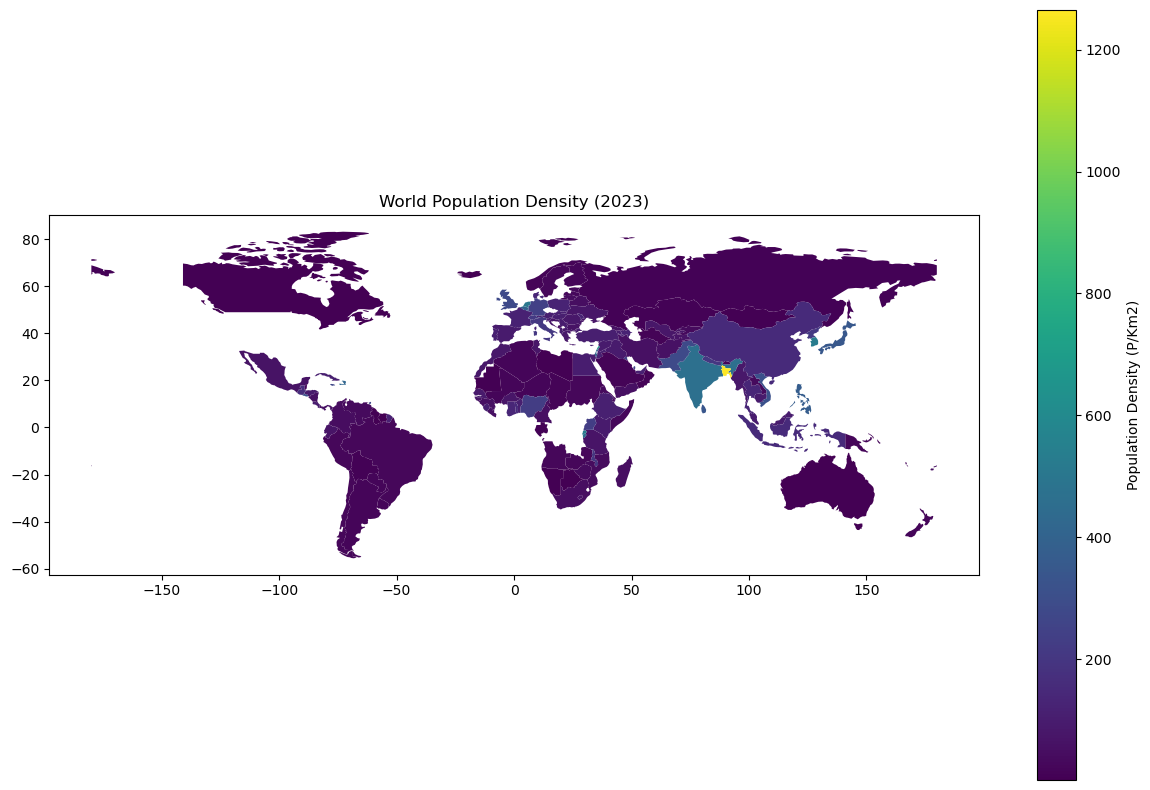

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Get the built-in dataset of world countries from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world dataset with our dataset on the "Country" column
merged = world.set_index('name').join(df.set_index('Country'))

# Clean the Density column to make it numeric
merged['Density\n(P/Km2)'] = merged['Density\n(P/Km2)'].str.replace(',', '').astype(float)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Density\n(P/Km2)', ax=ax, legend=True,
           legend_kwds={'label': "Population Density (P/Km2)"})
ax.set_title('World Population Density (2023)')
plt.show()


/tmp/ipykernel_21/3947922093.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)


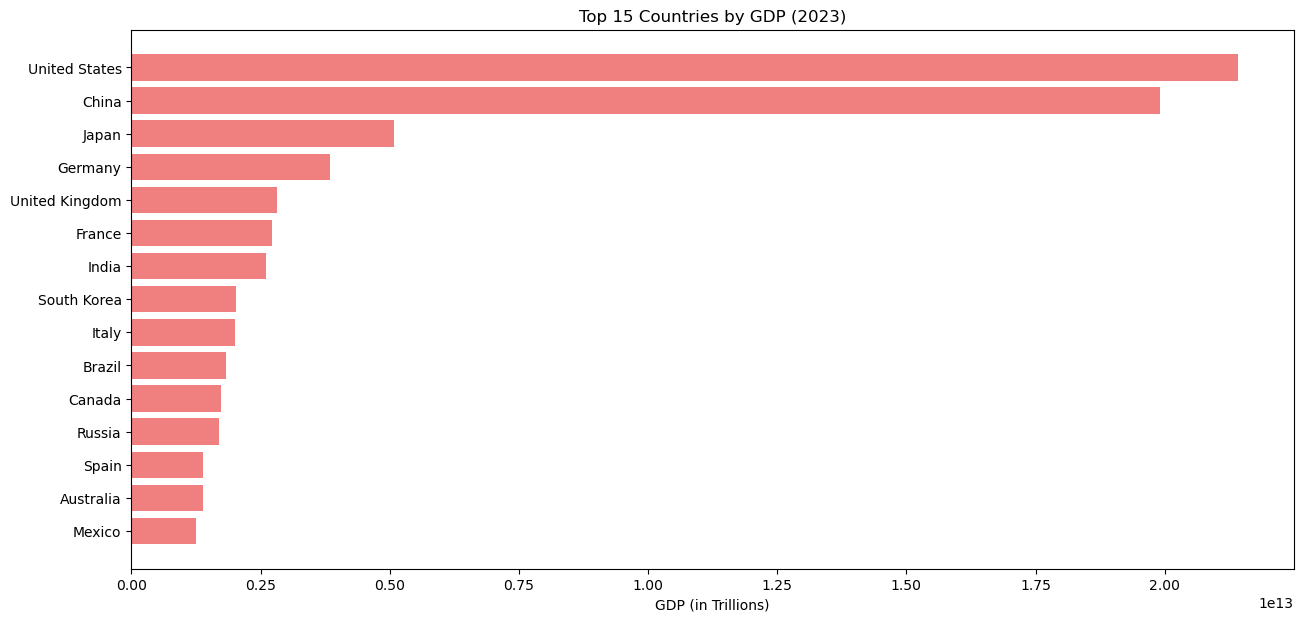

In [4]:
# Cleaning the GDP column by removing the dollar sign and commas, then converting to float
df['GDP'] = df['GDP'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)

# Sorting by GDP and taking the top 15 countries
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(15)

# Plotting
plt.figure(figsize=(15, 7))
plt.barh(top_gdp_countries['Country'], top_gdp_countries['GDP'], color='lightcoral')
plt.xlabel('GDP (in Trillions)')
plt.title('Top 15 Countries by GDP (2023)')
plt.gca().invert_yaxis()  # To display the country with the highest GDP at the top
plt.show()



In [5]:
# Displaying the column names to identify the correct names for the required columns
df.columns


Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

**Healthcare Metrics - Life Expectancy vs. Infant Mortality**

> In this visualization, we'll explore the relationship between life expectancy and infant mortality. A scatter plot will be effective for this purpose, allowing us to observe any correlations or patterns between these two crucial healthcare metrics

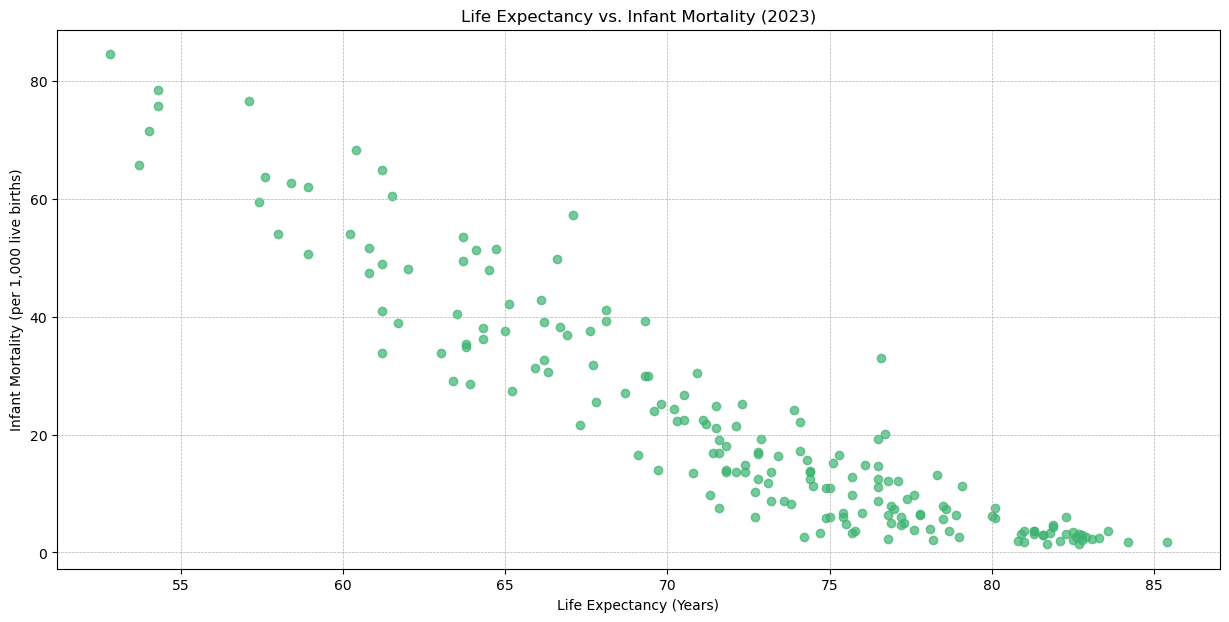

In [6]:
# Scatter plot for Life Expectancy vs. Infant Mortality
plt.figure(figsize=(15, 7))
plt.scatter(df['Life expectancy'], df['Infant mortality'], color='mediumseagreen', alpha=0.7)
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Infant Mortality (per 1,000 live births)')
plt.title('Life Expectancy vs. Infant Mortality (2023)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


**Education Metrics - Top Countries by Gross Tertiary Education Enrollment**

> For our next visualization, we'll focus on education. Specifically, we'll create a bar chart showcasing the top countries in terms of gross tertiary education enrollment. This metric offers insights into the level of higher education participation among the populations of different countries.

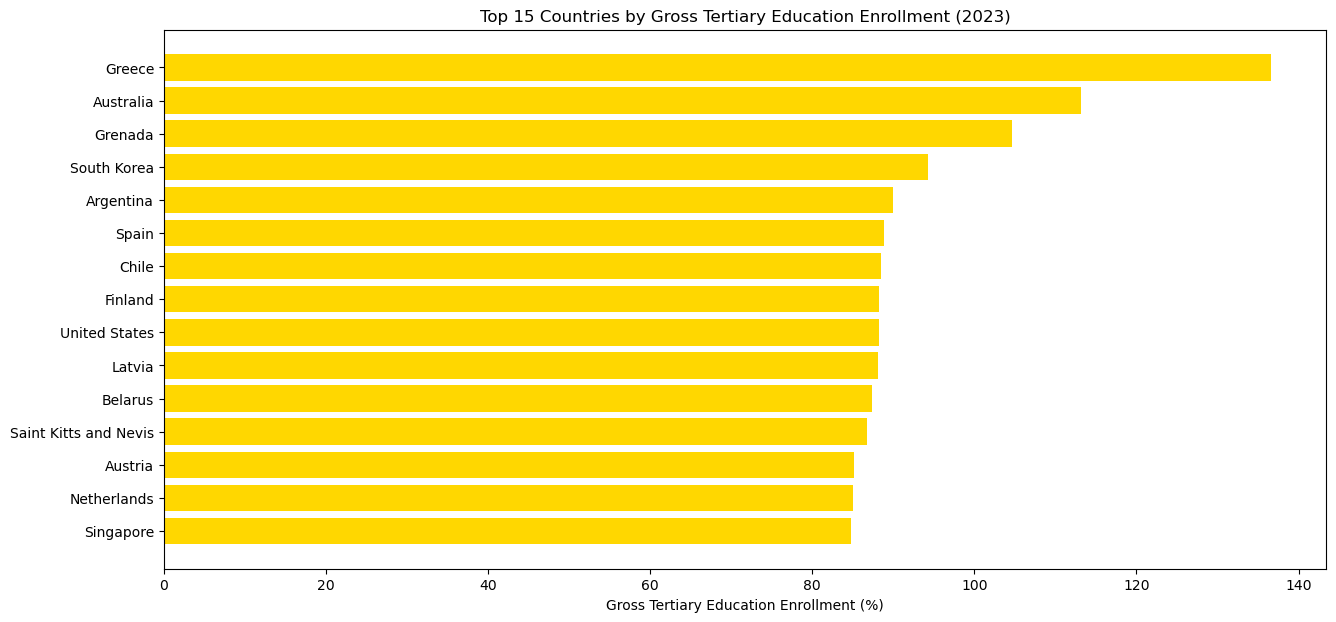

In [7]:
# Cleaning the 'Gross tertiary education enrollment (%)' column to make it numeric
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].str.replace('%', '').astype(float)

# Sorting by Gross Tertiary Education Enrollment and taking the top 15 countries
top_education_countries = df.sort_values(by='Gross tertiary education enrollment (%)', ascending=False).head(15)

# Plotting
plt.figure(figsize=(15, 7))
plt.barh(top_education_countries['Country'], top_education_countries['Gross tertiary education enrollment (%)'], color='gold')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.title('Top 15 Countries by Gross Tertiary Education Enrollment (2023)')
plt.gca().invert_yaxis()  # To display the country with the highest enrollment at the top
plt.show()


**Environmental Concern - Top Countries by CO2 Emissions**

> Environmental issues are of paramount importance in the modern world. In this visualization, we'll highlight the top countries contributing the most CO2 emissions, providing a perspective on which nations have the highest environmental impact in this specific metric.

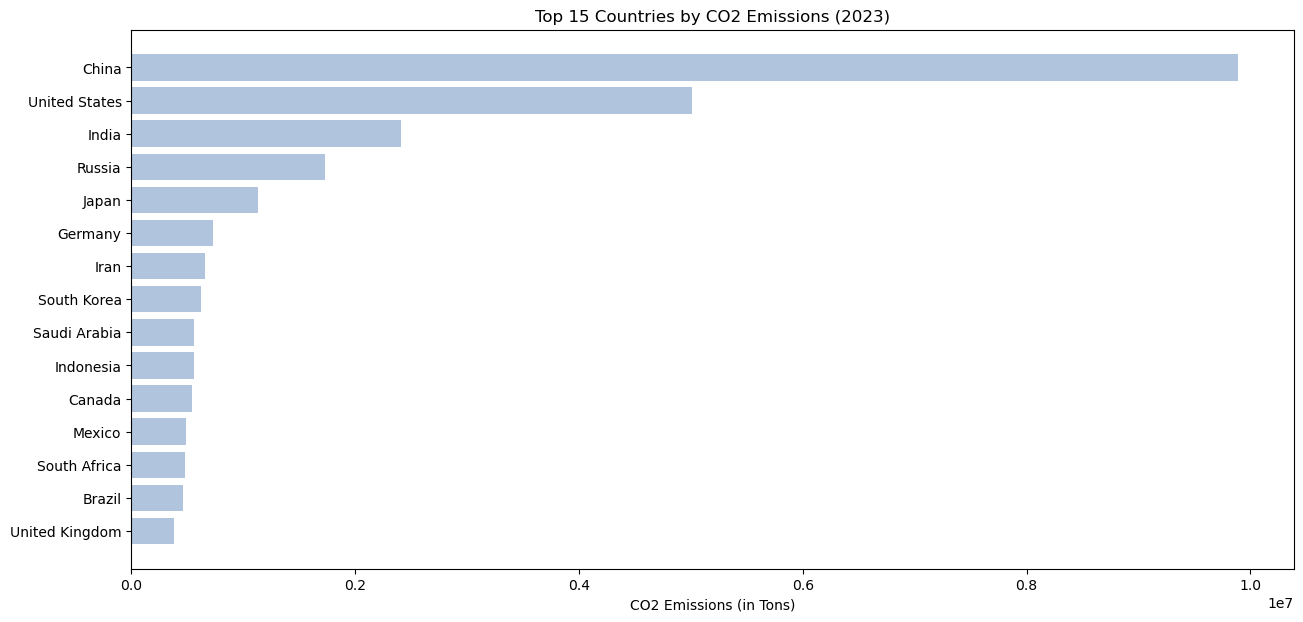

In [8]:
# Cleaning the 'Co2-Emissions' column to make it numeric
df['Co2-Emissions'] = df['Co2-Emissions'].str.replace(',', '').astype(float)

# Sorting by CO2 Emissions and taking the top 15 countries
top_emission_countries = df.sort_values(by='Co2-Emissions', ascending=False).head(15)

# Plotting
plt.figure(figsize=(15, 7))
plt.barh(top_emission_countries['Country'], top_emission_countries['Co2-Emissions'], color='lightsteelblue')
plt.xlabel('CO2 Emissions (in Tons)')
plt.title('Top 15 Countries by CO2 Emissions (2023)')
plt.gca().invert_yaxis()  # To display the country with the highest emissions at the top
plt.show()


**Labor Market Dynamics - Unemployment Rate vs. Labor Force Participation**

> Lastly, let's delve into the labor market dynamics. We'll create a scatter plot comparing the Unemployment Rate to the Labor Force Participation for each country. This will offer insights into the health and activity of the labor market across different nations.

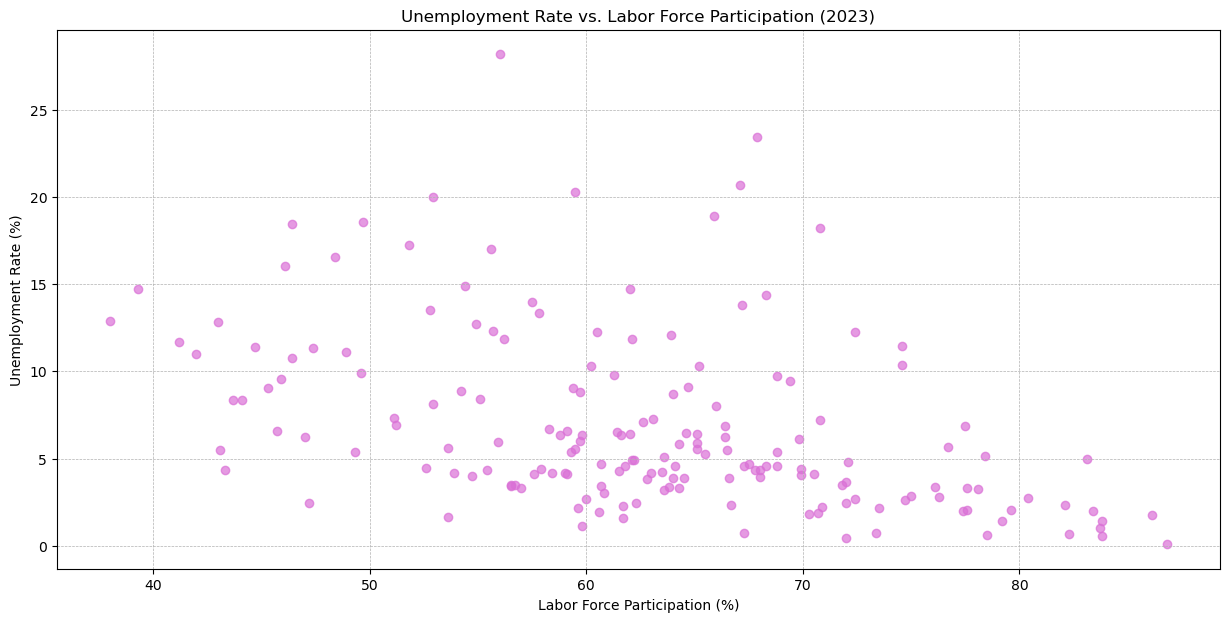

In [9]:
# Cleaning the columns to make them numeric
df['Unemployment rate'] = df['Unemployment rate'].str.replace('%', '').astype(float)
df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].str.replace('%', '').astype(float)

# Scatter plot for Unemployment Rate vs. Labor Force Participation
plt.figure(figsize=(15, 7))
plt.scatter(df['Population: Labor force participation (%)'], df['Unemployment rate'], color='orchid', alpha=0.7)
plt.xlabel('Labor Force Participation (%)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Labor Force Participation (2023)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [10]:
import plotly.express as px

# Adjusting the range of x-axis to exclude zero and then creating the scatter plot
fig = px.scatter(df[df['GDP'] > 0],  # Filtering out non-positive GDP values
                 x='GDP', 
                 y='Life expectancy', 
                 title='GDP vs. Selected Metrics (2023)',
                 hover_name='Country',
                 range_x=[df[df['GDP'] > 0]['GDP'].min(), df['GDP'].max() + 1000000000000],  # Adjusted range
                 log_x=True)  # Using log scale for better visualization



# Adjusting the property name and re-creating the scatter plot with dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Life Expectancy",
                     method="update",
                     args=[{"y": [df['Life expectancy']], "title": "GDP vs. Life Expectancy (2023)"}]),
                dict(label="Unemployment Rate",
                     method="update",
                     args=[{"y": [df['Unemployment rate']], "title": "GDP vs. Unemployment Rate (2023)"}]),
                dict(label="Tertiary Education Enrollment",
                     method="update",
                     args=[{"y": [df['Gross tertiary education enrollment (%)']], "title": "GDP vs. Tertiary Education Enrollment (2023)"}]),
                dict(label="Infant Mortality",
                     method="update",
                     args=[{"y": [df['Infant mortality']], "title": "GDP vs. Infant Mortality (2023)"}]),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig.show()


In [11]:
# Creating an interactive world map with dropdown for various metrics
fig_map = px.choropleth(df, 
                        locations="Country", 
                        locationmode='country names',
                        color="GDP",
                        hover_name="Country",
                        title='World Map of Selected Metrics (2023)',
                        color_continuous_scale=px.colors.sequential.Plasma)

# Adding dropdown options for various metrics
fig_map.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="GDP",
                     method="restyle",
                     args=["z", [df['GDP']]]),
                dict(label="CO2 Emissions",
                     method="restyle",
                     args=["z", [df['Co2-Emissions']]]),
                dict(label="Population Density",
                     method="restyle",
                     args=["z", [df['Density\n(P/Km2)']]]),
                dict(label="Life Expectancy",
                     method="restyle",
                     args=["z", [df['Life expectancy']]]),
                dict(label="Infant Mortality",
                     method="restyle",
                     args=["z", [df['Infant mortality']]]),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig_map.show()


**Distribution of Key Metrics**

We can create a set of histogram plots to understand the distribution of various key metrics across countries:

* GDP Distribution
* Life Expectancy Distribution
* CO2 Emissions Distribution
* Unemployment Rate Distribution

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



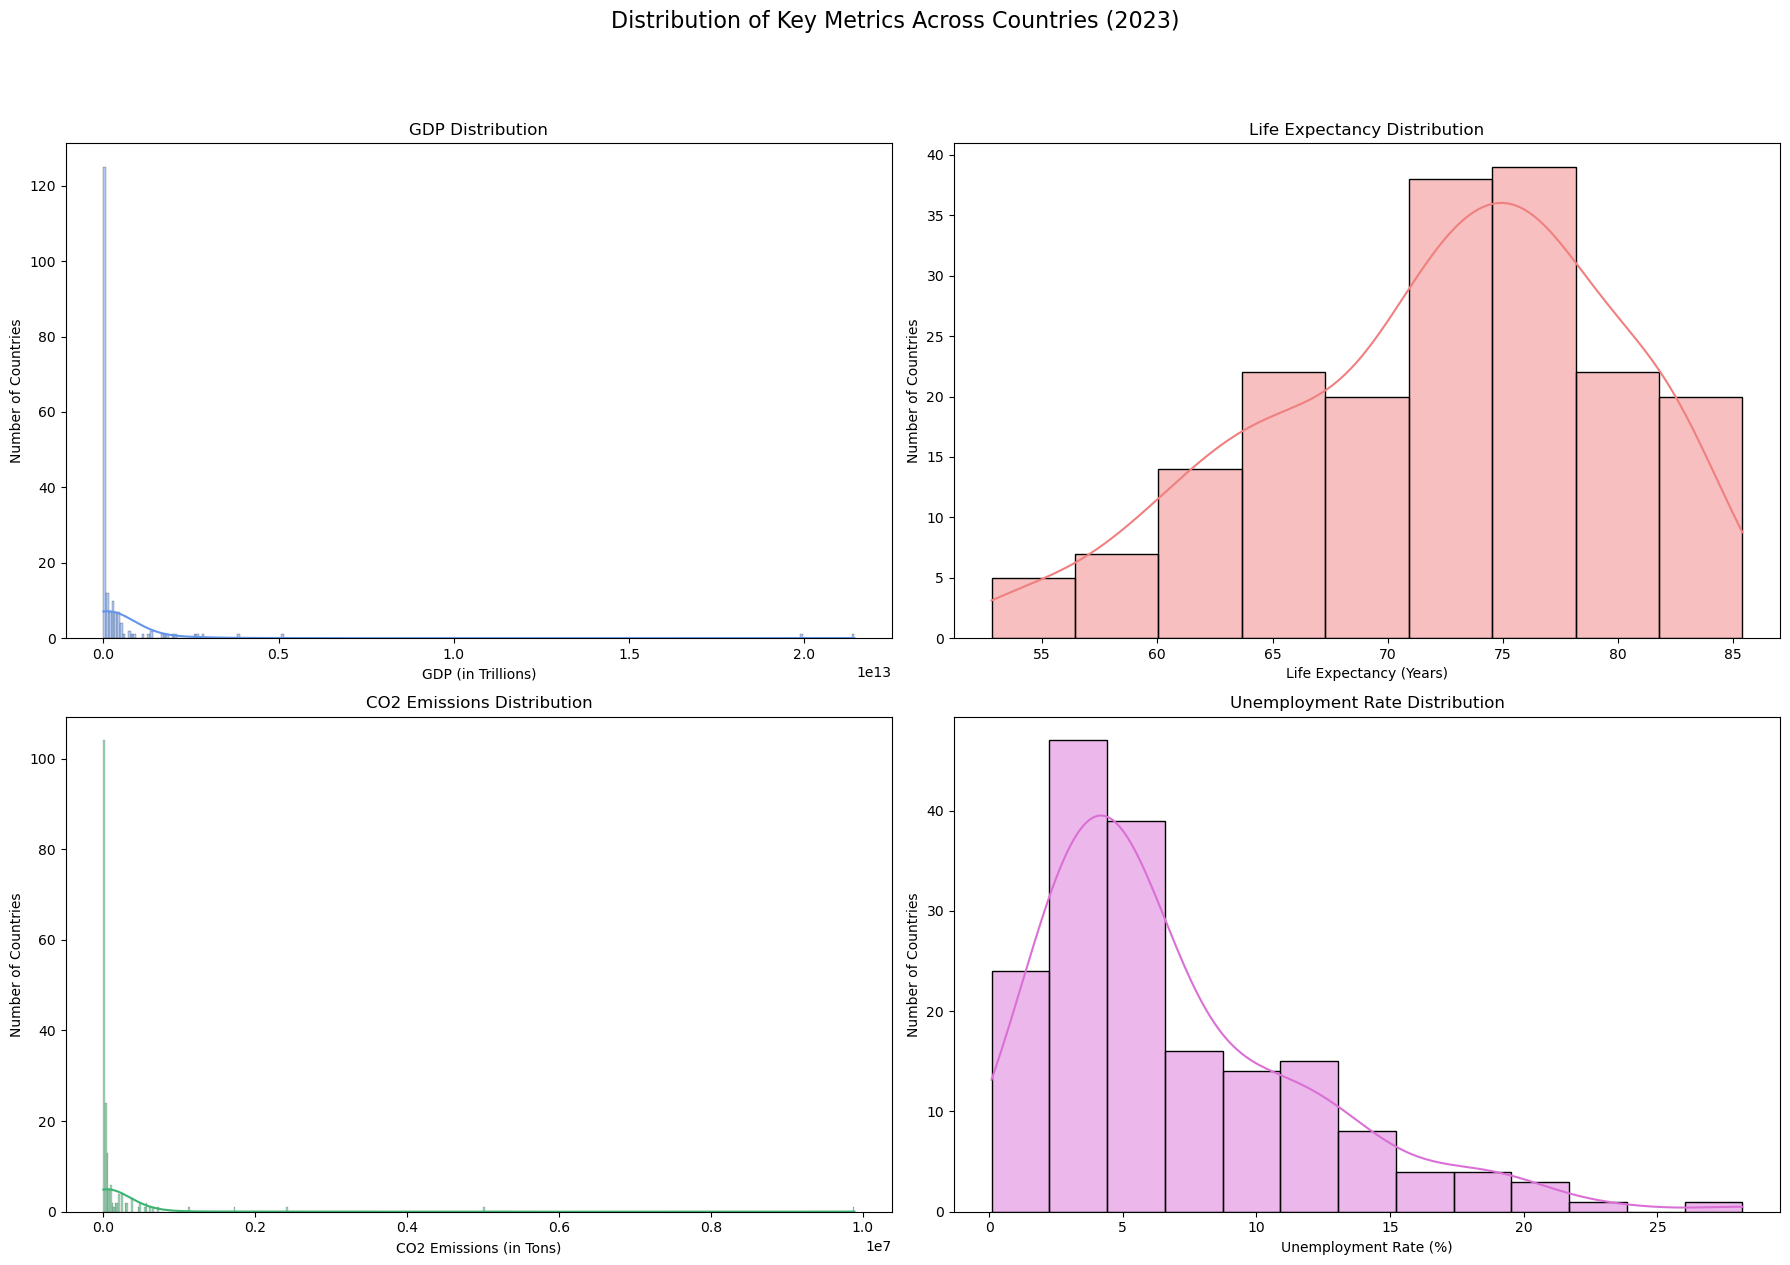

In [12]:
import seaborn as sns

# Setting up the subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Metrics Across Countries (2023)', fontsize=16, y=1.05)

# Plotting histograms for the selected metrics
sns.histplot(df['GDP'], kde=True, ax=axes[0, 0], color='cornflowerblue')
axes[0, 0].set_title('GDP Distribution')
axes[0, 0].set_xlabel('GDP (in Trillions)')
axes[0, 0].set_ylabel('Number of Countries')

sns.histplot(df['Life expectancy'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Life Expectancy Distribution')
axes[0, 1].set_xlabel('Life Expectancy (Years)')
axes[0, 1].set_ylabel('Number of Countries')

sns.histplot(df['Co2-Emissions'], kde=True, ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('CO2 Emissions Distribution')
axes[1, 0].set_xlabel('CO2 Emissions (in Tons)')
axes[1, 0].set_ylabel('Number of Countries')

sns.histplot(df['Unemployment rate'], kde=True, ax=axes[1, 1], color='orchid')
axes[1, 1].set_title('Unemployment Rate Distribution')
axes[1, 1].set_xlabel('Unemployment Rate (%)')
axes[1, 1].set_ylabel('Number of Countries')

plt.tight_layout()
plt.show()


* GDP Distribution: Most countries have a GDP in the lower range, with a few economic powerhouses skewing the distribution.
* Life Expectancy Distribution: Most countries have a life expectancy ranging between 60 to 85 years, with a peak around 75-80 years.
* CO2 Emissions Distribution: The majority of countries have relatively low CO2 emissions, with only a few countries having extremely high emissions.
* Unemployment Rate Distribution: Most countries have an unemployment rate below 20%, with a peak around 5-10%.

**Correlation Matrix**

Understanding the relationships between different metrics can provide valuable insights. We can create a correlation matrix heatmap to visualize how different metrics correlate with one another.

> This will allow us to see, for instance, if there's a strong relationship between GDP and Life Expectancy, or between CO2 Emissions and Population Density, etc.

/tmp/ipykernel_21/3207395622.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



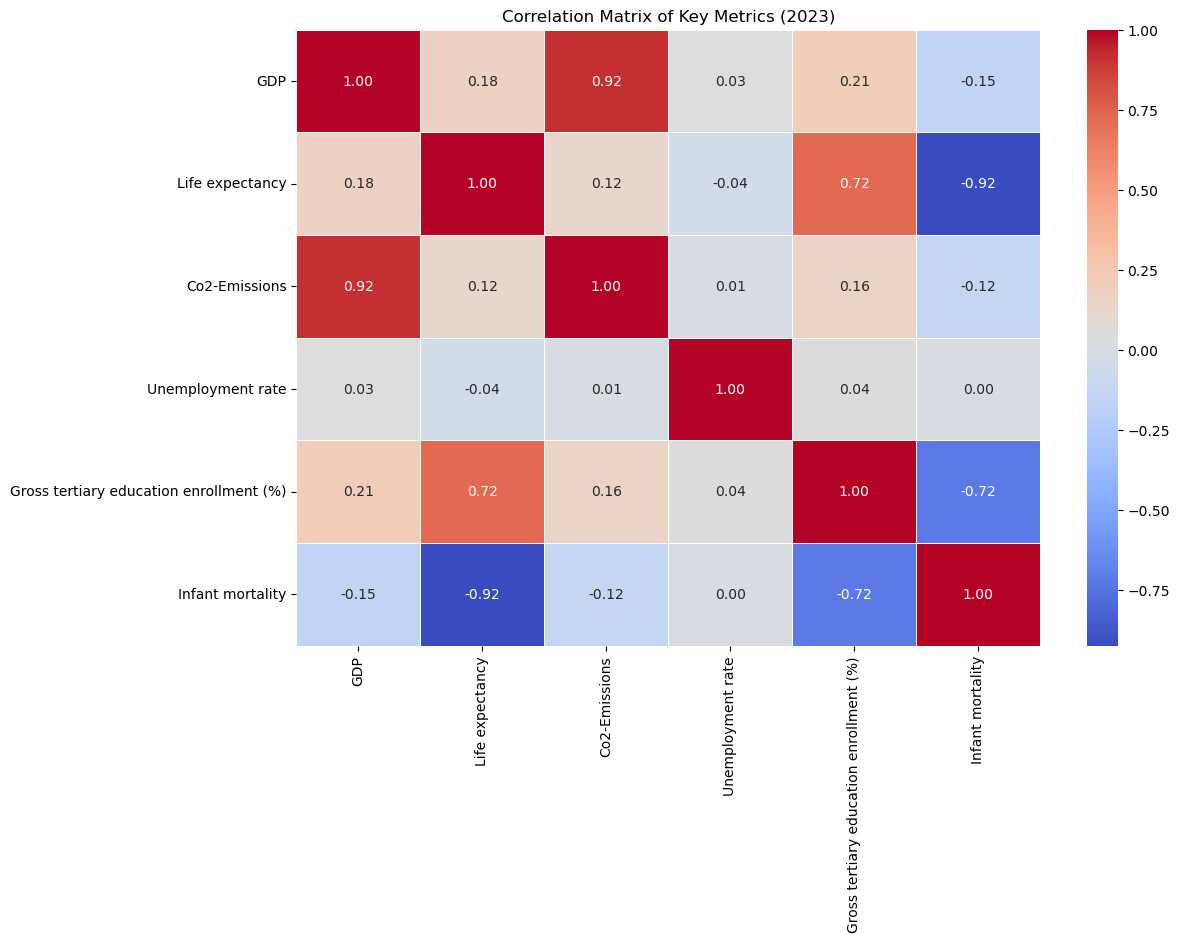

In [13]:
# Selecting a subset of columns for the correlation matrix
correlation_columns = ['GDP', 'Life expectancy', 'Co2-Emissions', 'Unemployment rate', 
                       'Gross tertiary education enrollment (%)', 'Density\n(P/Km2)', 'Infant mortality']
correlation_data = df[correlation_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Key Metrics (2023)')
plt.show()


The correlation matrix heatmap provides insights into the relationships between various metrics:

* GDP & Life Expectancy: A positive correlation suggests that countries with higher GDP tend to have higher life expectancy.
* GDP & CO2 Emissions: A positive correlation indicates that countries with higher GDP tend to emit more CO2.
* Life Expectancy & Infant Mortality: A negative correlation indicates that countries with higher life expectancy tend to have lower infant mortality rates.
* Unemployment Rate & Tertiary Education Enrollment: A negative correlation suggests that countries with higher tertiary education enrollment rates tend to have lower unemployment rates.

**Top Countries by Forested Area Percentage**

> Deforestation is a significant environmental concern. In this visualization, we'll focus on the positive side by showcasing countries with the highest percentage of forested areas. This metric provides insights into countries that maintain vast expanses of natural forests.

In [14]:
# Displaying the column names to identify the correct name for the "Forested area (%)" column
[col for col in df.columns if "forest" in col.lower()]


['Forested Area (%)']

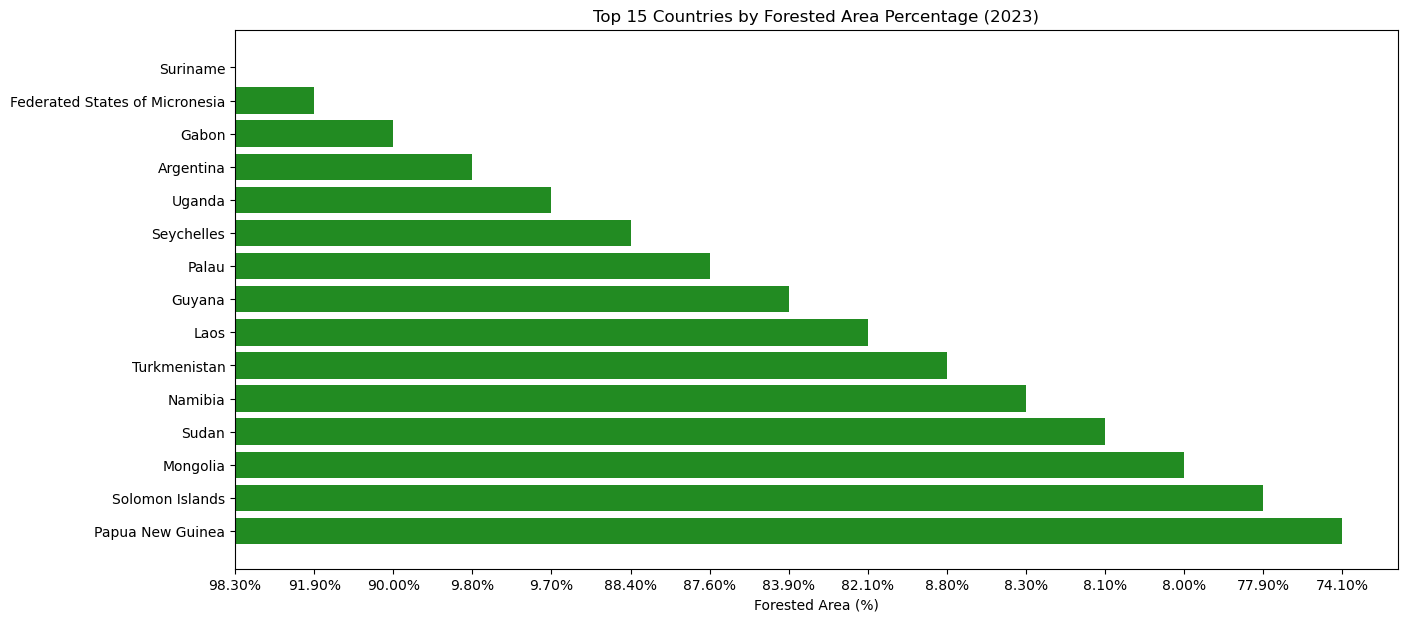

In [15]:
# Sorting by 'Forested Area (%)' and taking the top 15 countries
top_forest_countries = df.sort_values(by='Forested Area (%)', ascending=False).head(15)

# Plotting
plt.figure(figsize=(15, 7))
plt.barh(top_forest_countries['Country'], top_forest_countries['Forested Area (%)'], color='forestgreen')
plt.xlabel('Forested Area (%)')
plt.title('Top 15 Countries by Forested Area Percentage (2023)')
plt.gca().invert_yaxis()  # To display the country with the highest percentage at the top
plt.show()


Here are the top 15 countries with the highest percentages of forested areas:

> These nations have prioritized the conservation or maintenance of their natural forests, which is crucial for biodiversity, carbon sequestration, and numerous other environmental benefits.

**Relationship between Tax Revenue and GDP**

> Tax revenue as a percentage of GDP can be an insightful metric for understanding a country's fiscal policies and government funding. We'll create a scatter plot to observe the relationship between a country's GDP and its tax revenue as a percentage of that GDP. This will give insights into whether economically stronger countries tend to collect more or less tax relative to their GDP.

In [16]:
# Displaying the column names to identify the correct name for the "Tax Revenue (%)" column
[col for col in df.columns if "tax" in col.lower()]


['Tax revenue (%)', 'Total tax rate']

In [17]:
# Displaying unique values of the "Tax revenue (%)" column to inspect the nature of the data
df['Tax revenue (%)'].unique()


array(['9.30%', '18.60%', '37.20%', nan, '9.20%', '16.50%', '10.10%',
       '20.90%', '23.00%', '25.40%', '13.00%', '14.80%', '4.20%', '8.80%',
       '27.50%', '14.70%', '24.00%', '26.30%', '10.80%', '16.00%',
       '17.00%', '20.40%', '19.50%', '14.20%', '20.20%', '15.00%',
       '13.60%', '11.80%', '20.10%', '17.10%', '12.80%', '8.60%',
       '18.20%', '9.40%', '14.40%', '9.00%', '22.00%', '24.50%', '14.90%',
       '10.70%', '32.40%', '22.10%', '12.50%', '18.10%', '6.10%',
       '28.60%', '7.50%', '24.20%', '20.80%', '10.20%', '21.70%',
       '11.50%', '12.60%', '26.20%', '19.40%', '10.60%', '10.30%',
       '17.30%', '23.30%', '11.20%', '7.40%', '2.00%', '18.30%', '23.10%',
       '24.30%', '26.80%', '11.90%', '15.10%', '11.70%', '1.40%',
       '18.00%', '12.90%', '22.90%', '15.30%', '31.60%', '16.90%',
       '26.50%', '12.00%', '11.60%', '17.80%', '19.10%', '13.10%',
       '25.20%', '17.70%', '16.80%', '21.90%', '0.00%', '5.40%', '27.10%',
       '20.70%', '29.00%', '15.

**Relationship between GDP and Education**

> We can examine the relationship between a country's GDP and its tertiary education enrollment. This can provide insights into the importance of education in a country's economic success. Let's create a scatter plot to visualize this relationship.

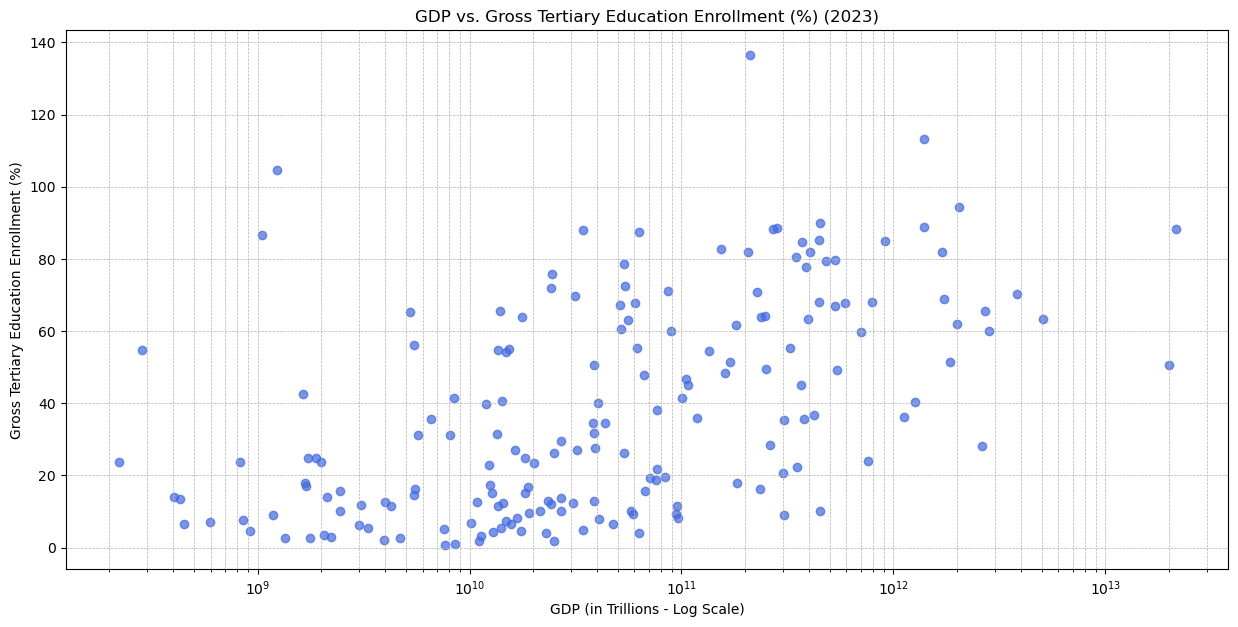

In [18]:
# Scatter plot for GDP vs. Gross Tertiary Education Enrollment (%)
plt.figure(figsize=(15, 7))
plt.scatter(df['GDP'], df['Gross tertiary education enrollment (%)'], color='royalblue', alpha=0.7)
plt.xscale('log')  # Using log scale for better visualization of GDP
plt.xlabel('GDP (in Trillions - Log Scale)')
plt.ylabel('Gross Tertiary Education Enrollment (%)')
plt.title('GDP vs. Gross Tertiary Education Enrollment (%) (2023)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Scatter plot showcasing the relationship between GDP and Gross Tertiary Education Enrollment (%) for the year 2023:

* Most countries, regardless of their GDP, have a high tertiary education enrollment rate, which suggests the importance of higher education across diverse economic contexts.
* There's a cluster of countries with a higher GDP that also exhibit a high tertiary education enrollment rate. This might indicate that countries with robust economies prioritize or have better access to tertiary education.

In [19]:
# Converting the 'Population' column to numeric, setting errors='coerce' to handle non-numeric values by converting them to NaN
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

# Checking for any non-numeric values that might have been converted to NaN
nan_population_countries = df[df['Population'].isna()]['Country'].tolist()
nan_population_countries


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'The Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Ivory Coast',
 'Cape Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Republic of the Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'The Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
# Checking a sample of the 'Population' column values to determine the format
sample_population_values = df['Population'].sample(10)
sample_population_values


120   NaN
24    NaN
89    NaN
130   NaN
122   NaN
14    NaN
99    NaN
128   NaN
159   NaN
181   NaN
Name: Population, dtype: float64

In [21]:
# Checking the column names to identify the correct name for the "CO2 Emissions" column
[col for col in df.columns if "co2" in col.lower() or "emission" in col.lower()]


['Co2-Emissions']

In [22]:
# Selecting top 10 countries with highest CO2 emissions
top10_co2 = df.nlargest(10, 'Co2-Emissions')

# Creating a bar chart for these countries
fig = px.bar(top10_co2, 
             x='Country', 
             y='Co2-Emissions',
             title='Top 10 Countries with Highest CO2 Emissions (2023)',
             color='Co2-Emissions',
             labels={'Co2-Emissions': 'CO2 Emissions (tons)'})
fig.show()


In [23]:
pip install pandas plotly


Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import plotly.express as px


In [25]:
def country_to_continent(country):
    mapping = {
        'Asia': ['China', 'India', 'Japan', 'South Korea', 'Russia', 'Indonesia', 'Turkey', 'Saudi Arabia', 'Iran', 'Israel'],
        'North America': ['United States', 'Canada', 'Mexico'],
        'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru'],
        'Europe': ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Netherlands', 'Sweden', 'Norway', 'Poland', 'Switzerland'],
        'Africa': ['Nigeria', 'South Africa', 'Egypt', 'Kenya', 'Morocco'],
        'Oceania': ['Australia', 'New Zealand'],
    }
    
    for continent, countries in mapping.items():
        if country in countries:
            return continent
    return 'Others'


In [26]:
df['Co2-Emissions'].fillna(df['Co2-Emissions'].median(), inplace=True)


In [27]:
df['Continent'] = df['Country'].apply(country_to_continent)


In [28]:
fig = px.scatter(df, 
                 x='GDP', 
                 y='Life expectancy', 
                 size='Co2-Emissions', 
                 color='Continent',
                 hover_name='Country',
                 log_x=True,  
                 size_max=100,  
                 title='GDP vs. Life Expectancy with CO2 Emissions (2023)')
fig.show()
